In [1]:
!wget -nc http://atit.upslp.edu.mx/~omar/nlp/AirlineTweets.csv

--2023-10-30 23:03:41--  http://atit.upslp.edu.mx/~omar/nlp/AirlineTweets.csv
Resolving atit.upslp.edu.mx (atit.upslp.edu.mx)... 200.94.105.48
Connecting to atit.upslp.edu.mx (atit.upslp.edu.mx)|200.94.105.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [application/octet-stream]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  2.34MB/s    in 1.4s    

2023-10-30 23:03:43 (2.34 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

In [4]:
df = pd.read_csv('AirlineTweets.csv')

In [5]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [6]:
df = df[['airline_sentiment','text']]

<Axes: >

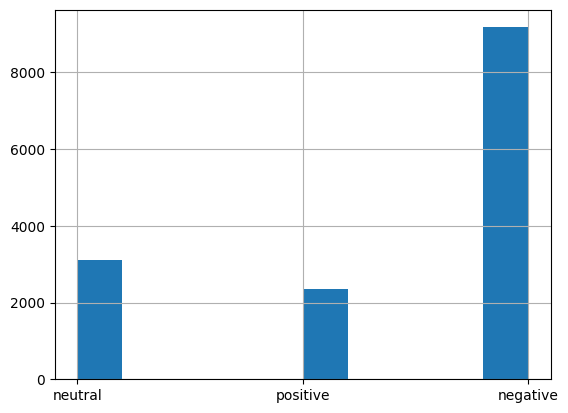

In [7]:
df['airline_sentiment'].hist()

In [8]:
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [9]:
target_map = {'positive' : 1, 'negative' : 0}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

airline_sentiment                                               text  target
1          positive  @VirginAmerica plus you've added commercials t...       1
3          negative  @VirginAmerica it's really aggressive to blast...       0
4          negative  @VirginAmerica and it's a really big bad thing...       0
5          negative  @VirginAmerica seriously would pay $30 a fligh...       0
6          positive  @VirginAmerica yes, nearly every time I fly VX...       1

In [11]:
df_train , df_test = train_test_split(df, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(max_features=2000)
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])

In [13]:
df_train

airline_sentiment                                               text  \
8735           positive  @JetBlue Thanks for having us hang out at Tamp...   
13018          negative  @AmericanAir Was told you could only refund me...   
12607          negative  @AmericanAir #2298. Everyone else  was outstan...   
1440           negative  @united UA1731 - Denver to Austin...  Still on...   
12181          negative  @AmericanAir The issue is the lack of consider...   
...                 ...                                                ...   
14349          negative  @AmericanAir she should not only get a refund ...   
6718           negative  @SouthwestAir I need updates on my flights 464...   
7098           positive  Lovely! RT @JetBlue: Our fleet’s on fleek. htt...   
1149           negative  @united Okay thanks if you could please update...   
9639           negative  @USAirways IS THIS RINGLING BROTHERS BARNUM AN...   

       target  
8735        1  
13018       0  
12607       0  
1440        0  
12181       0  
...       ...  
14349       0  
6718        0  
7098        1  
1149        0  
9639        0  

[8655 rows x 3 columns]

In [14]:
df_test

airline_sentiment                                               text  \
11825          negative  @USAirways They charged me for a flight they C...   
8105           positive  @JetBlue great flight! Great view! :-) http://...   
1279           negative  @united they're not, actually. gate agent was ...   
14343          negative  @AmericanAir No worries they called back 4 hrs...   
3829           positive  @united thank you. There was one here a few mo...   
...                 ...                                                ...   
8225           negative                            @JetBlue my butt hurts.   
1344           positive  @united hi JP, with the help of an awesome TSA...   
8624           negative  @JetBlue Call was not made by the inflight cre...   
10771          negative  @USAirways how about checking the plane before...   
2217           negative  @united &amp; finally he was told he couldnt u...   

       target  
11825       0  
8105        1  
1279        0  
14343       0  
3829        1  
...       ...  
8225        0  
1344        1  
8624        0  
10771       0  
2217        0  

[2886 rows x 3 columns]

In [15]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [16]:
y_train = df_train['target']
y_test = df_test['target']


In [17]:
D = x_train.shape[1]
D

2000

In [18]:
#creacion del modelo
i = Input(shape=(D,))
x = Dense(1)(i)   #Sigmoid incluido en la perdida

model1 = Model(i,x)

In [19]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model1.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)


In [21]:
r = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=40,
    batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 2s 16ms/step - loss: 0.5027 - accuracy: 0.7920 - val_loss: 0.3968 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 1s 11ms/step - loss: 0.3751 - accuracy: 0.7972 - val_loss: 0.3390 - val_accuracy: 0.8219
Epoch 3/40
68/68 [==============================] - 1s 8ms/step - loss: 0.3218 - accuracy: 0.8192 - val_loss: 0.3025 - val_accuracy: 0.8420
Epoch 4/40
68/68 [==============================] - 1s 12ms/step - loss: 0.2847 - accuracy: 0.8451 - val_loss: 0.2768 - val_accuracy: 0.8604
Epoch 5/40
68/68 [==============================] - 1s 11ms/step - loss: 0.2573 - accuracy: 0.8639 - val_loss: 0.2581 - val_accuracy: 0.8766
Epoch 6/40
68/68 [==============================] - 1s 10ms/step - loss: 0.2365 - accuracy: 0.8810 - val_loss: 0.2444 - val_accuracy: 0.8881
Epoch 7/40
68/68 [==============================] - 1s 11ms/step - loss: 0.2201 - accuracy: 0.8924 - val_loss: 0.2336 - val_accuracy: 0.9009
Epoch 8/40
68/

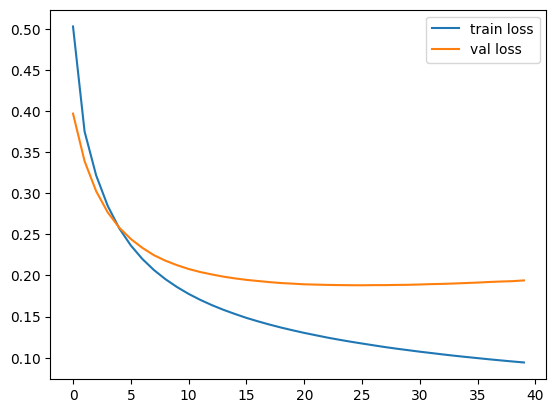

In [22]:
#grafica de iteraciones
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

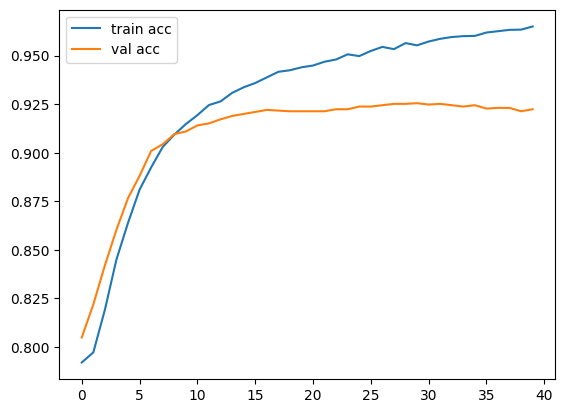

In [23]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [24]:
p_train = ((model1.predict(x_train) > 0) * 1.0).flatten()
p_test = ((model1.predict(x_test) > 0) * 1.0).flatten()

91/91 [==============================] - 0s 1ms/step


In [25]:
cm = confusion_matrix(y_train, p_train, normalize='true')
cm

array([[0.99110139, 0.00889861],
       [0.09777778, 0.90222222]])

In [26]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

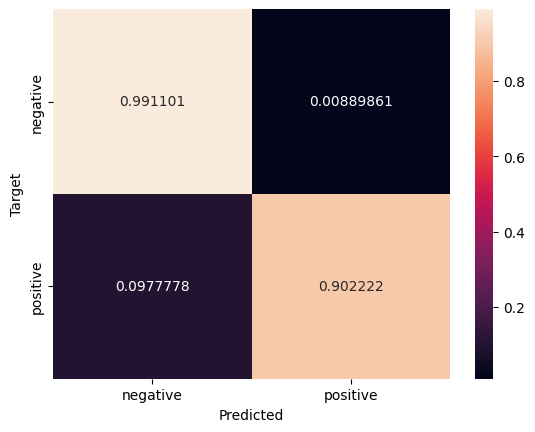

In [27]:
plot_cm(cm)

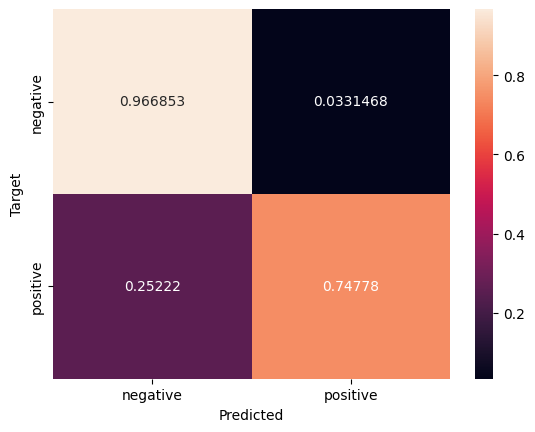

In [28]:
cm_test = confusion_matrix(y_test, p_test, normalize='true')
plot_cm(cm_test)

In [29]:
pr_train = model1.predict(x_train)
pr_test = model1.predict(x_test)
print("Train AUC:", roc_auc_score(y_train, pr_train))
print("Test AUC:", roc_auc_score(y_test, pr_test))

91/91 [==============================] - 0s 3ms/step
Train AUC: 0.9950100494367453
Test AUC: 0.954708074097239


In [30]:
print("Train F1 Score:", f1_score(y_train, p_train))
print("Test F1 Score:", f1_score(y_test, p_test))

Train F1 Score: 0.9319942611190819
Test F1 Score: 0.7935909519321396


In [31]:
model1.layers

In [32]:
model1.layers[1].get_weights()

[array([[-3.677121 ],
        [ 3.2777412],
        [-1.5760779],
        ...,
        [ 2.052947 ],
        [ 1.5905634],
        [-2.9164236]], dtype=float32),
 array([-0.24958345], dtype=float32)]

In [33]:
w = model1.layers[1].get_weights()[0]

In [34]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 973,
 'thanks': 1726,
 'for': 753,
 'having': 855,
 'us': 1859,
 'hang': 838,
 'out': 1262,
 'at': 197,
 'tampa': 1708,
 'airport': 122,
 'forever': 756,
 'today': 1767,
 'it': 964,
 'really': 1420,
 'been': 243,
 'an': 147,
 'awesome': 217,
 'experience': 654,
 'americanair': 143,
 'was': 1898,
 'told': 1770,
 'you': 1993,
 'could': 452,
 'only': 1245,
 'refund': 1434,
 'me': 1107,
 'the': 1730,
 'cost': 448,
 'of': 1224,
 'my': 1179,
 'original': 1254,
 'return': 1476,
 'flight': 726,
 'note': 1211,
 'had': 828,
 'booked': 273,
 'more': 1164,
 'expensive': 653,
 'everyone': 635,
 'else': 602,
 'outstanding': 1267,
 'united': 1842,
 'denver': 516,
 'to': 1766,
 'austin': 207,
 'still': 1660,
 'on': 1239,
 'ground': 820,
 'issue': 961,
 'is': 959,
 'lack': 999,
 'announcement': 151,
 'made': 1086,
 'so': 1606,
 'late': 1010,
 'when': 1929,
 'gate': 793,
 'agent': 113,
 'there': 1734,
 'over': 1268,
 'hour': 897,
 'southwestair': 1626,
 'hold': 880,
 '30': 36,
 'min': 1141,


In [35]:
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight > threshold:
    word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
thank 9.743426
thanks 9.384616
worries 8.351263
great 7.9436445
awesome 7.3452125
love 7.2896094
excellent 7.0932755
kudos 6.711008
amazing 6.457927
best 6.1160216
